In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!ls /content/gdrive/'My Drive'/'combined_data.csv'

'/content/gdrive/My Drive/combined_data.csv'


In [3]:
base = pd.read_csv('/content/gdrive/My Drive/combined_data.csv', encoding='utf-8')
print(base.columns)

Index(['source_name', 'url', 'created_date', 'tag', 'heading', 'author',
       'article_text', 'label'],
      dtype='object')


In [0]:
inp_file0 = base.copy()

In [0]:
# regular 0 non regular all others
inp_file0['label'] = inp_file0['label'].apply(lambda x: 'regular' if x=='regular' else 'other')

In [17]:
inp_file0.head()

,source_name,url,created_date,tag,heading,author,article_text,label
0,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-06-29 00:00:00,"homes, construction, larkfield, estates, worke...",Larkfield\xe2\x80\x99s returning residents cop...,GUY KOVNER,\nHaley and Fletcher Skerrett loved suburban L...,regular
1,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-07-16 00:00:00,"hospital, fire, rosa, santa, tito, fires, jose...",'You felt more normal': St. Joseph Health empl...,MARTIN ESPINOZA,\nThere is little sign today of the smoke-lace...,regular
2,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-07-23 00:00:00,"sandy, sonoma, angie, center, luz, sisters, co...",Sonoma Valley sisters join forces to give fire...,DIANNE REBER HART,\nWhen the North Bay wildfires broke out in 20...,regular
3,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-07-03 00:00:00,"campus, teachers, hidden, students, valley, sa...",Santa Rosa teachers rebuild sense of safety on...,MATT VILLANO,\nThe rebuilding process has taken many forms ...,regular
4,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-07-01 00:00:00,"fire, montecito, heights, neighbors, flames, n...",\xe2\x80\x98I had to get it down\xe2\x80\x99: ...,CHRIS SMITH,\nWe\xe2\x80\x99ll never know if retired schoo...,regular


In [18]:
print(inp_file0['label'].unique())

['regular' 'other']


In [19]:
# the news sources being covered currently
print(inp_file0['source_name'].unique())

['Press Democrat' 'NW Florida Daily' 'Gazette-mail'
 'Washington Observer Report' 'Californian' 'New York Times' 'Enid News'
 'NJSpotlight' 'Digital Journal']


In [0]:
# grouping the file by source name and author
inp_file = inp_file0.groupby(['source_name','author','label']).size().reset_index(name='counts')

In [29]:
inp_file.head()

,source_name,author,label,counts
0,Californian,A.G. Kawamura,other,1
1,Californian,ALAN SCULLEY For The Californian,regular,4
2,Californian,ANNA SMITH For The Californian,regular,6
3,Californian,Aaron Stonelake,regular,1
4,Californian,"Adam Black, Bakersfield",other,2


In [0]:
import matplotlib.pyplot as plt
# function to plot a histogram

def plot_graph(df, title):
  plt.bar(df.loc[:, 'author'], df.loc[:, 'counts'], align='center')
  plt.xticks(rotation=90)
  plt.xlabel('Author Name')
  plt.ylabel('No of articles')
  plt.title(title)
  

In [0]:
# Top authors for regular and non-regular combined
inp_file2 = inp_file0.groupby(['label','author']).size().reset_index(name='counts')

In [0]:
# filtering based on regular article type
regular = inp_file2[inp_file2['label'].str.match('regular')].sort_values('counts', ascending=False)
df1 = regular.iloc[1:10, 1:3]
df1

,author,counts
4461,Tim Sandle,700
2428,Cass Rains,588
3421,Karen Graham,578
4435,The Bakersfield Californian,571
4337,Staff,553
3823,Mitchell Willetts,479
3164,James Neal,442
2768,Enid News & Eagle,429
4342,Staff report,359


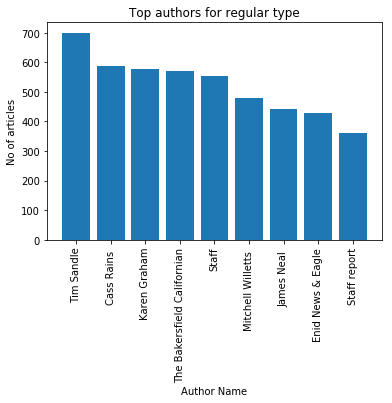

In [0]:
plot_graph(df1, 'Top authors for regular type')

In [0]:
# filtering based on non-regular article type
non_regular = inp_file2[inp_file2['label'].str.match('other')].sort_values('counts', ascending=False)
df2 = non_regular.iloc[1:10, 1:3]
df2

,author,counts
849,Ken Hanly,97
1165,Paul Wallis,92
1400,THE EDITORIAL BOARD,88
619,James Neal,76
658,Jeff Mullin,73
1128,Not available,63
327,Dave Ruthenberg,43
335,David Christy,40
814,Karen Graham,38


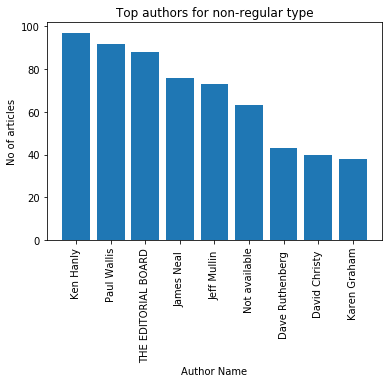

In [0]:
plot_graph(df2, 'Top authors for non-regular type')

In [0]:
#Top authors for New York Times in both category
ny_times = inp_file[inp_file['source_name'].str.match('New York Times')].sort_values('counts', ascending=False)
df = ny_times.iloc[1:10, 1:3]
df

,author,counts
3509,The Editorial Board,37
3508,The Associated Press,33
3511,The New York Times,32
3193,Katie Rogers,20
3237,Maggie Haberman,20
2904,Charles McDermid,20
2913,Chris Stanford,17
3192,Katie Benner,16
3154,Jonathan Martin,16


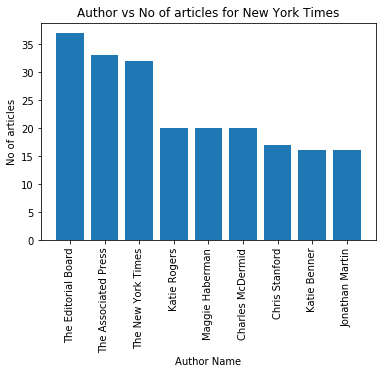

In [0]:
plot_graph(df, 'Author vs No of articles for New York Times')

In [0]:
# Top authors for regular and non-regular combined for Washington Observer Report
wa_observer = inp_file[inp_file['source_name'].str.match('Washington Observer Report')].sort_values('counts', ascending=False)
wa_observer[['author_fname', 'author_lname', 'email']] = wa_observer['author'].str.split(' ', 2, expand=True)

In [0]:
wa_observer.columns

Index(['source_name', 'author', 'counts', 'author_fname', 'author_lname',
       'email'],
      dtype='object')

In [0]:
df = wa_observer.iloc[0:10, 1:5]

In [0]:
df['author_lname'].fillna(value='', inplace=True)

In [0]:
df

,author,counts,author_fname,author_lname
4585,Staff,568,Staff,
4574,Rick Shrum Business writer rshrum@observer-rep...,83,Rick,Shrum
4533,Katie Anderson Staff writer kanderson@observer...,72,Katie,Anderson
4457,Barbara S. Miller Staff writer bmiller@observe...,71,Barbara,S.
4582,Scott Beveridge Staff writer sbeveridge@observ...,64,Scott,Beveridge
4553,Luke Campbell Staff writer lcampbell@observer-...,54,Luke,Campbell
4523,Jon Andreassi Staff writer jandreassi@observer...,52,Jon,Andreassi
4504,Gideon Bradshaw Staff writer gbradshaw@observe...,44,Gideon,Bradshaw
4455,Associated Press,39,Associated,Press
4507,Harry Funk Staff writer hfunk@thealmanac.net,39,Harry,Funk


In [0]:
df['author'] = df[['author_fname', 'author_lname']].apply(lambda x:' '.join(x), axis=1)
df['author']

4585              Staff 
4574          Rick Shrum
4533      Katie Anderson
4457          Barbara S.
4582     Scott Beveridge
4553       Luke Campbell
4523       Jon Andreassi
4504     Gideon Bradshaw
4455    Associated Press
4507          Harry Funk
Name: author, dtype: object

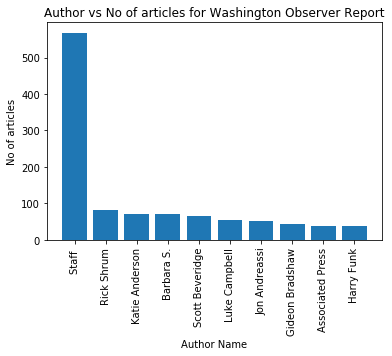

In [0]:
plot_graph(df, 'Author vs No of articles for Washington Observer Report')

In [0]:
# Top authors for regular and non-regular combined for Californian
californian = inp_file[inp_file['source_name'].str.match('Californian')].sort_values('counts', ascending=False)

In [0]:
californian[['author_fname', 'author_lname', 'email']] = californian['author'].str.split(' ', 2, expand=True)

In [0]:
californian['author'] = californian[['author_fname', 'author_lname']].apply(lambda x: ' '.join(x), axis=1)

In [0]:
df = californian.iloc[1:10, 1:3]

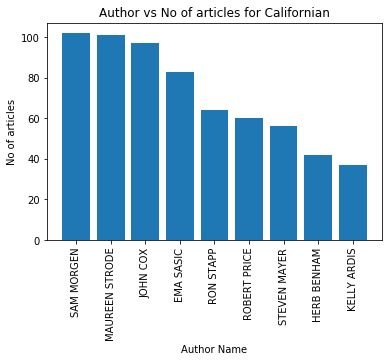

In [0]:
plot_graph(df, 'Author vs No of articles for Californian')

In [25]:
# Top authors for regular and non-regular combined for Digital Journal
digital_jrnl = inp_file[inp_file['source_name'].str.match('Digital Journal')].sort_values('counts', ascending=False)
digital_jrnl.head()

,source_name,author,label,counts
859,Digital Journal,Markos Papadatos,regular,1104
1002,Digital Journal,Tim Sandle,regular,700
806,Digital Journal,Karen Graham,regular,578
815,Digital Journal,Ken Hanly,regular,243
814,Digital Journal,Ken Hanly,other,97


In [32]:
# Top authors for regular and non-regular combined for Press Democrat
press_democrat = inp_file[inp_file['source_name'].str.match('Press Democrat')].sort_values('counts', ascending=False)
press_democrat['author'] = press_democrat['author'].str.replace('YOU CAN SEND A LETTER TO THE EDITOR AT LETTERS@PRESSDEMOCRAT.COM.', 'THE EDITORIAL BOARD')
df = press_democrat.iloc[0:10, 1:5]
df

,author,label,counts
3663,ASSOCIATED PRESS,regular,264
4297,"R,I ROSSMANN",regular,89
4409,THE EDITORIAL BOARD,other,88
4447,WILL SCHMITT,regular,74
4454,THE EDITORIAL BOARD,regular,70
4239,NASHELLY CHAVEZ,regular,68
4437,TYLER SILVY,regular,65
3690,BILL SWINDELL,regular,61
4085,KEVIN FIXLER,regular,59
3953,JEANNE PHILLIPS,regular,57


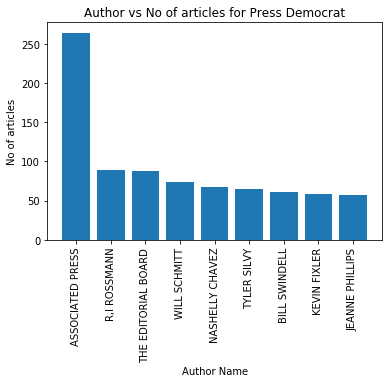

In [33]:
plot_graph(df, 'Author vs No of articles for Press Democrat')

In [36]:
# Top authors for regular and non-regular combined for NW Florida Daily
nwf = inp_file[inp_file['source_name'].str.match('NW Florida Daily')].sort_values('counts', ascending=False)
nwf[['author_fname', 'author_lname', 'email']] = nwf['author'].str.split(' ', 2, expand=True)
df = nwf.iloc[0:10, 1:6]
df


,author,label,counts,author_fname,author_lname
2709,SETH STRINGER @SethSnwfdn,regular,277,SETH,STRINGER
2633,Jim Thompson @Jimtnwfdn,regular,228,Jim,Thompson
2472,By Sam Grubenhoff | 315-4476 | @SamGrubenhoff ...,regular,221,By,Sam
2729,Special to GateHouse Media Florida,regular,197,Special,to
2747,TOM McLAUGHLIN @TomMnwfdn,regular,195,TOM,McLAUGHLIN
2748,TONY JUDNICH @Tonyjnwfdn,regular,174,TONY,JUDNICH
2807,staff report,regular,172,staff,report
2602,GateHouse Media Florida staff report,regular,172,GateHouse,Media
2648,Kaylin Parker @parkerNWFDN,regular,171,Kaylin,Parker
2708,SAVANNAH EVANOFF @SavannahEnwfdn,regular,154,SAVANNAH,EVANOFF


In [37]:
df['author'] = df[['author_fname', 'author_lname']].apply(lambda x:' '.join(x), axis=1)
df['author']


2709       SETH STRINGER
2633        Jim Thompson
2472              By Sam
2729          Special to
2747      TOM McLAUGHLIN
2748        TONY JUDNICH
2807        staff report
2602     GateHouse Media
2648       Kaylin Parker
2708    SAVANNAH EVANOFF
Name: author, dtype: object

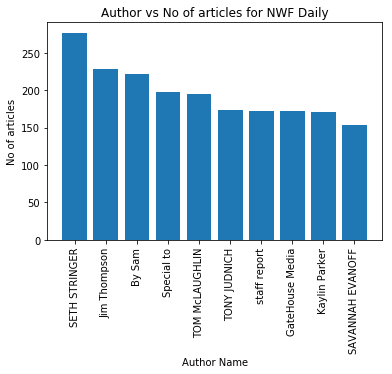

In [38]:
plot_graph(df, 'Author vs No of articles for NWF Daily')

In [49]:
# Top authors for regular and non-regular combined for Gazette Mail
gazette = inp_file[inp_file['source_name'].str.match('Gazette-mail')].sort_values('counts', ascending=False)
gazette['author'] = gazette['author'].str.replace('Staff reports', 'Staff report')
gazette[['author_fname', 'author_lname', 'email']] = gazette['author'].str.split(' ', 2, expand=True)
df = gazette.iloc[0:10, 1:6]
df['author'] = df[['author_fname', 'author_lname']].apply(lambda x:' '.join(x), axis=1)
df

,author,label,counts,author_fname,author_lname
1912,Staff report,regular,344,Staff,report
1910,Staff report,regular,216,Staff,report
1954,Tom Bragg,regular,202,Tom,Bragg
1866,Rick Ryan,regular,158,Rick,Ryan
1476,Bill Lynch,regular,152,Bill,Lynch
1867,Rick Steelhammer,regular,152,Rick,Steelhammer
1842,Phil Kabler,regular,137,Phil,Kabler
1739,Lacie Pierson,regular,125,Lacie,Pierson
1892,Ryan Quinn,regular,124,Ryan,Quinn
1886,Ryan Pritt,regular,123,Ryan,Pritt


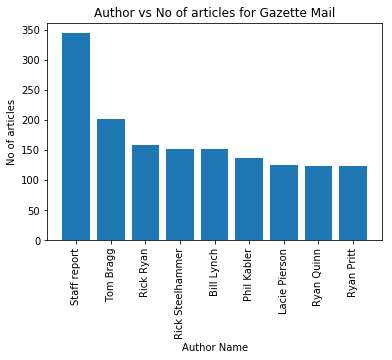

In [0]:
plot_graph(df, 'Author vs No of articles for Gazette Mail')

In [0]:
# Top authors for regular and non-regular combined for Enid News
enid = inp_file[inp_file['source_name'].str.match('Enid News')].sort_values('counts', ascending=False)
df = enid.iloc[0:10, 1:3]
df


,author,counts
1178,Cass Rains,588
1247,James Neal,518
1320,Mitchell Willetts,481
1223,Enid News & Eagle,450
1350,Ryan Miller,226
1226,Enid News & Eagle Editorial Board,162
1200,Dave Ruthenberg,142
1380,Tim Godfrey,141
1151,By Tim Godfrey Staff Writer,124
1074,By Cass Rains Staff Writer,113


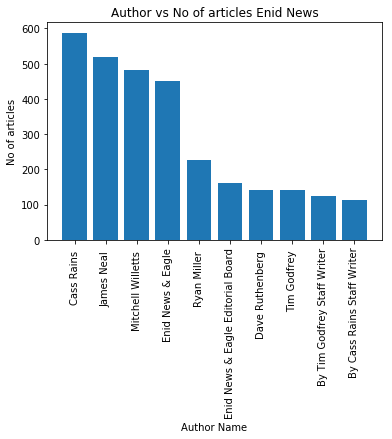

In [0]:
plot_graph(df, 'Author vs No of articles Enid News')

In [0]:
# Top authors for regular and non-regular combined for NJSpotlight
nj_spotlight = inp_file[inp_file['source_name'].str.match('NJSpotlight')].sort_values('counts', ascending=False)
df = nj_spotlight.iloc[0:10, 1:3]
df


,author,counts
2114,Tom Johnson,234
2022,John Reitmeyer,220
2041,Lilo H. Stainton,190
1976,Colleen O'Dea,187
1968,Carly Sitrin,76
2067,NJTV News online,70
1961,Brenda Flanagan,60
2025,Jon Hurdle,51
2065,NJ Spotlight,50
2021,John Mooney,31


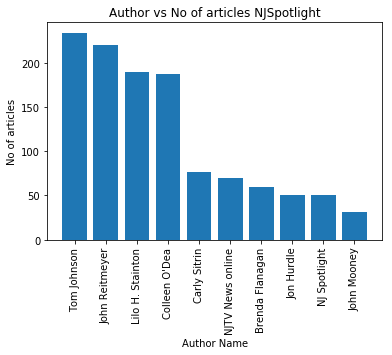

In [0]:
plot_graph(df, 'Author vs No of articles NJSpotlight')

In [0]:
author_check = base.copy()

In [5]:
author_check['label'] = author_check['label'].str.replace('0', 'regular')
author_check['label'] = author_check['label'].str.replace('1', 'other')
author_check['label'] = author_check['label'].str.replace('2', 'other')

author_check['label'].unique()

array(['regular', 'guest', 'editorial', 'other', 'oped', 'opinion'],
      dtype=object)

In [0]:
# grouping the file by source name and label
inp_file3 = author_check.groupby(['source_name','label']).size().reset_index(name='counts')

In [0]:
# plots to show which category is covered by which newspaper
def plot_grap_hori(df, label):
  plt.barh(df.loc[:,'source_name'], df.loc[:, 'counts'], align="center")
  plt.xticks()
  plt.ylabel('Source Name')
  plt.xlabel('Counts')
  plt.title(label)

In [8]:
d1 = inp_file3[inp_file3['label'].str.match('editorial')].sort_values('counts', ascending=False)
d1

,source_name,label,counts
8,Gazette-mail,editorial,162
20,Press Democrat,editorial,88
23,Washington Observer Report,editorial,11


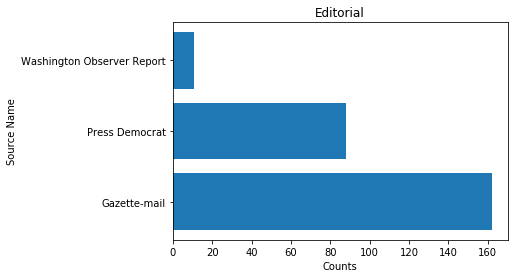

In [9]:
plot_grap_hori(d1, 'Editorial')

In [10]:
d2 = inp_file3[inp_file3['label'].str.match('guest')].sort_values('counts', ascending=False)
d2

,source_name,label,counts
9,Gazette-mail,guest,268
15,NW Florida Daily,guest,160
5,Enid News,guest,37
21,Press Democrat,guest,21
24,Washington Observer Report,guest,4
0,Californian,guest,1


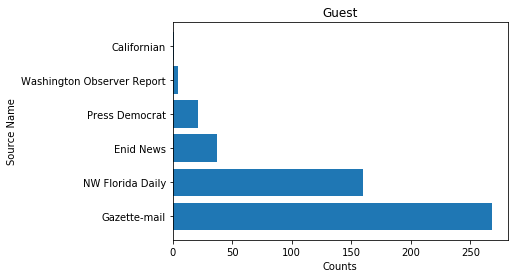

In [11]:
plot_grap_hori(d2, 'Guest')

In [12]:
d3 = inp_file3[inp_file3['label'].str.match('oped')].sort_values('counts', ascending=False)
d3

,source_name,label,counts
3,Digital Journal,oped,256
10,Gazette-mail,oped,234
13,NJSpotlight,oped,137
25,Washington Observer Report,oped,16


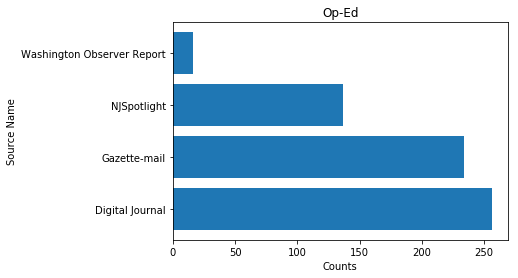

In [13]:
plot_grap_hori(d3, 'Op-Ed')

In [0]:
digital_jrnl = digital_jrnl[digital_jrnl['label'].str.match('oped')].sort_values('counts', ascending=False)

In [0]:
df = digital_jrnl.iloc[0:10, 1:4]
df

,author,label,counts
814,Ken Hanly,oped,97
917,Paul Wallis,oped,92
805,Karen Graham,oped,38
858,Markos Papadatos,oped,27
1001,Tim Sandle,oped,2


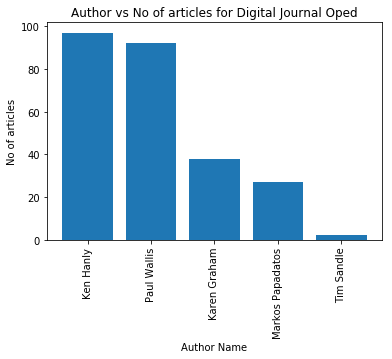

In [0]:
plot_graph(df, 'Author vs No of articles for Digital Journal Oped')

In [0]:
nyt4 = inp_file3[inp_file3['label'].str.match('opinion')].sort_values('counts', ascending=False)
nyt4

,source_name,label,counts
6,Enid News,opinion,630
1,Californian,opinion,426


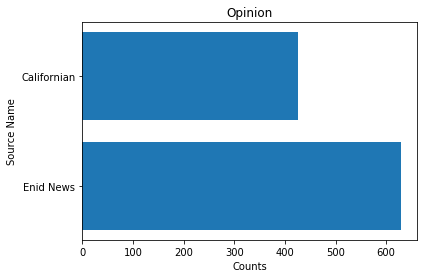

In [0]:
plot_grap_hori(nyt4, 'Opinion')

In [0]:
nyt5 = inp_file3[inp_file3['label'].str.match('regular')].sort_values('counts', ascending=False)
nyt5

,source_name,label,counts
17,NW Florida Daily,regular,5368
7,Enid News,regular,4913
12,Gazette-mail,regular,4447
4,Digital Journal,regular,3720
22,Press Democrat,regular,3426
19,New York Times,regular,2349
2,Californian,regular,1732
27,Washington Observer Report,regular,1624
14,NJSpotlight,regular,1412


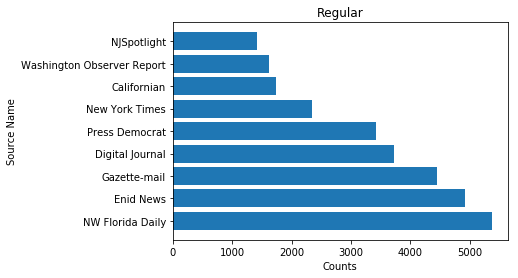

In [0]:
plot_grap_hori(nyt5, 'Regular')

In [39]:
#after finding top newssource generating regular news finding the top contributor for regular type
nwf = nwf[nwf['label'].str.match('regular')].sort_values('counts', ascending=False)
df = nwf.iloc[0:10, 1:4]
df

,author,label,counts
2709,SETH STRINGER @SethSnwfdn,regular,277
2633,Jim Thompson @Jimtnwfdn,regular,228
2472,By Sam Grubenhoff | 315-4476 | @SamGrubenhoff ...,regular,221
2729,Special to GateHouse Media Florida,regular,197
2747,TOM McLAUGHLIN @TomMnwfdn,regular,195
2748,TONY JUDNICH @Tonyjnwfdn,regular,174
2807,staff report,regular,172
2602,GateHouse Media Florida staff report,regular,172
2648,Kaylin Parker @parkerNWFDN,regular,171
2708,SAVANNAH EVANOFF @SavannahEnwfdn,regular,154


In [41]:
df[['author_fname', 'author_lname', 'email']] = df['author'].str.split(' ', 2, expand=True)
df['author'] = df[['author_fname', 'author_lname']].apply(lambda x:' '.join(x), axis=1)
df['author']

2709       SETH STRINGER
2633        Jim Thompson
2472              By Sam
2729          Special to
2747      TOM McLAUGHLIN
2748        TONY JUDNICH
2807        staff report
2602     GateHouse Media
2648       Kaylin Parker
2708    SAVANNAH EVANOFF
Name: author, dtype: object

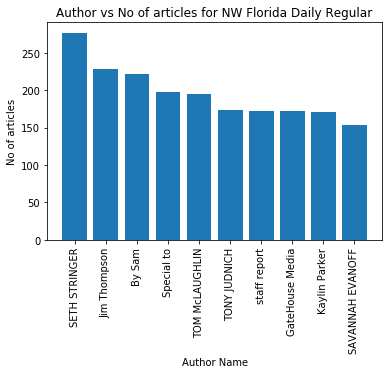

In [42]:
plot_graph(df, 'Author vs No of articles for NW Florida Daily Regular')